<a href="https://colab.research.google.com/github/TmTrojcak/Computational_Physics/blob/main/Tyler_Trojcak_Lab08_part2_FFT_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pyplot and numpy
import numpy as np
import matplotlib.pyplot as plt

# Part 0: Calculating the Frequency Array

When we calculate the Fourier Transform using `np.fft.rfft`, we get back an array of amplitudes that tell us how much different frequency sine/cosine waves contribute to make the input wave.

If you have an array of time values, `t`, then you can calculate an array of frequency values to plot with the output from `np.fft.rfft` using the code below.
```python
n=len(t)
dt = (t[1]-t[0])*(n-1)

# create an array of frequency values that you can plot
# with the output from np.fft.rfftfreq
frequency = np.fft.rfftfreq(n, d = dt)
```

# Part 1: Code Your Own FFT

(5 points)

Using the slides from class, implement your own version of the discrete fourier transform.




In [36]:
# your function here
def dft(y):
  """
  PARAMETERS
  y: array giving amplitude at evenly spaced time intervals

  RETURN
  c: fourier coefficients

  """
  # you can copy code from the slides
  N = len(y)
  c = np.zeros(N//2+1, dtype=complex)
  for n in range(N//2+1):
    for m in range(N):
      c[n] += y[m] * np.exp(-2j*np.pi*m*n/N)
  return c

Rebuild your composite cosine wave from the first part of the lab, and feed the amplitude into your dft function.  Compare your results with those from the `numpy.fft.fft` function.

[2.  1.  0.5]


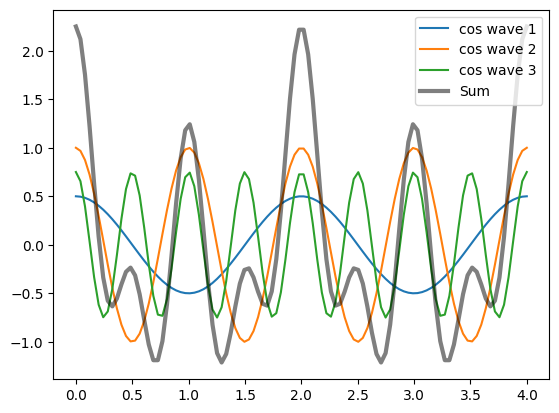

In [37]:
# rebuild sum of 3 cosine waves here
om = np.array([np.pi,2*np.pi,4*np.pi])
Twave = 2*np.pi/om
print(Twave)
amp = [0.5,1,0.75]
phi = [np.pi/2,np.pi,3*np.pi/2]
phi = np.zeros(len(om))
t = np.linspace(0,4,100)
plt.figure()
sumwave = np.zeros(len(t))
for i,o in enumerate(om):
  y = amp[i]*np.cos(om[i]*t+phi[i])
  sumwave += y
  plt.plot(t,y,label=f"cos wave {i+1}")
plt.plot(t,sumwave,lw='3',color='k',ls='-',label='Sum',alpha=0.5)
plt.legend()

In [38]:
# pass your y array into your dft function
c = dft(y)

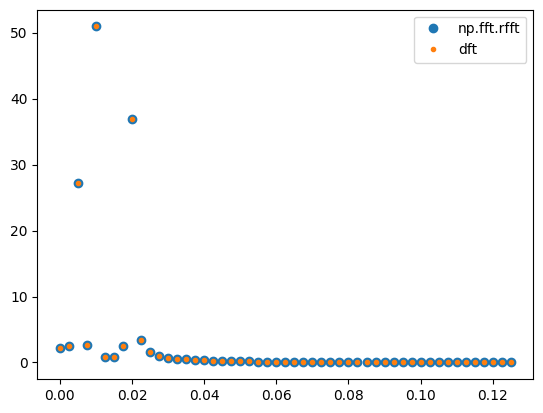

In [44]:
# compare the output from your function with the output from np.fft.rfft
# plot the absolute value of the frequency spectrum for both
# plot your results using points

# np.fft.rfft function results
N = len(t)
dt = (t[1]-t[0])*(N-1)
frequency = np.fft.rfftfreq(N, d = dt)
Y = np.fft.rfft(sumwave)
powerY = np.abs(Y)

# dft function results
C = dft(sumwave)
powerC = np.abs(C)

# Plot results
plt.figure()
plt.plot(frequency, powerY, 'o', label = 'np.fft.rfft')
plt.plot(frequency, powerC, '.', label = 'dft')
plt.legend()

In [45]:
# time how long it takes the dft function to run
%time a = dft(sumwave)

CPU times: user 9.78 ms, sys: 30 µs, total: 9.81 ms
Wall time: 9.77 ms


In [46]:
# time how long it takes the fft fuction to run
%time b = np.fft.rfft(sumwave)

CPU times: user 139 µs, sys: 0 ns, total: 139 µs
Wall time: 147 µs


# Part 2: The Inverse Fourier Transform

(5 points)

Take the `np.fft.rfft` and then the `np.fft.irfft` of your summed cosine wave.

```
Y = np.fft.rfft(sumwave)
Yinv = np.fft.irfft(Y)
```

Compare the output of the `irfft` (ynew) with the original wave (sumwave). To do this, plot both waves on the same plot.  Plot the original with a solid line and the recreated wave with black circles.  Be sure to add a legend and lable your axes.

Here is my result for comparison:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p2.png" width=300 >

In [47]:
# your code here
Y = np.fft.rfft(sumwave)
Yinv = np.fft.irfft(Y)

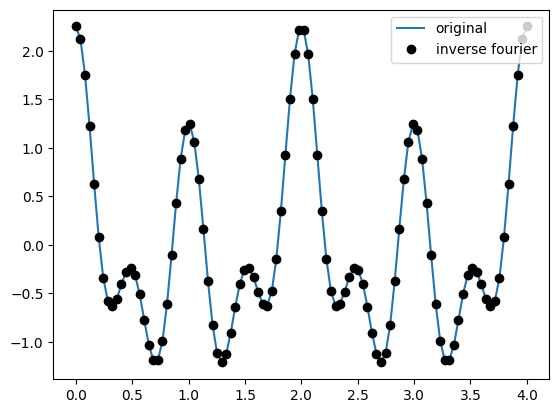

In [134]:
# your plot here
plt.figure()
plt.plot(t, sumwave, label='original')
plt.plot(t, Yinv, 'ko', label='inverse fourier')
plt.legend()

# Part 3: Filter out noise from an audio signal

(5 points)

Make a program that will filter out noise from an audio signal.  
* To do this, you should construct a sine or cosine function, with a frequency of 1 Hz.

* Add two additional cosine functions with a frequency that are 10 and 15 times higher and an amplitude that is 10 and 15 times lower.

* We will consider the high frequency waves to be noise.

* Make a function called `filter_noise` that takes the input wave and returns the cleaned function

Here is the wave I made:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3a.png" width=300 >


Here is the a figure showing the Fourier components of the original and cleaned signal:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3b.png" width=300 >

Here is my input and cleaned signals:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3c.png" width=300 >

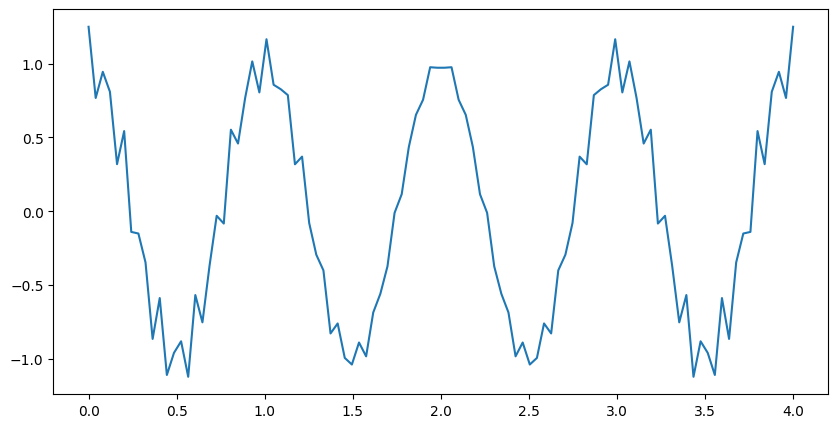

In [98]:
# Your code here to construct input signal
t = np.linspace(0,4,100)

def freq1(t, f = 1, A = 1):
  freq1 = A*np.cos(2*np.pi*f*t)
  return freq1

def noise1(t, f = 10, A = 0.1):
  noise1 = A*np.cos(2*np.pi*f*t)
  return noise1

def noise2(t, f = 15, A = 0.15):
  noise2 = A*np.cos(2*np.pi*f*t)
  return noise2

sumwave2 = freq1(t) + noise1(t) + noise2(t)

# plot the input signal
plt.figure(figsize=(10,5))
plt.plot(t, sumwave2)

Text(0, 0.5, 'amplitude')

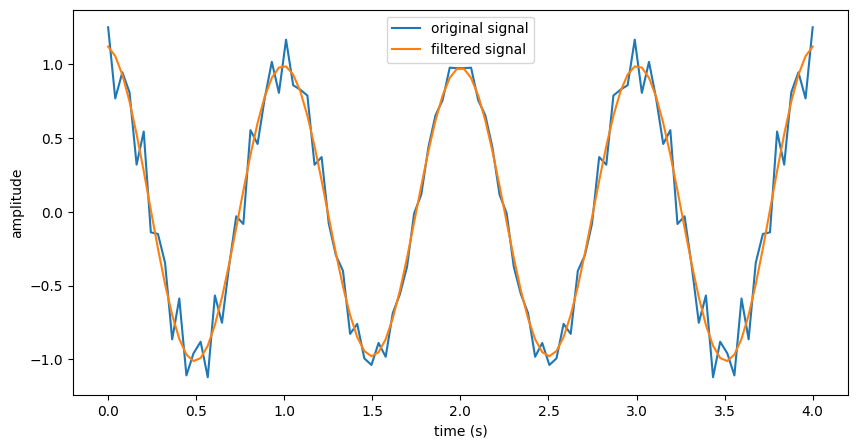

In [116]:
def filter_noise(y, t, fmax=1):
  # take the fft
  Y = np.fft.fft(y)
  # filter noise - any frequencies above fmax
  N = len(y)
  dt = t[1] - t[0]
  freq = np.fft.fftfreq(N, d=dt)

  Y[np.abs(freq) > fmax] = 0
  # take the ifft of the filtered wave
  yfiltered = np.fft.ifft(Y)

  # return results
  return yfiltered

# Test function
t = np.linspace(0,4,100)
yfiltered = filter_noise(sumwave2, t)

plt.figure(figsize=(10,5))
plt.plot(t, sumwave2, label = 'original signal')
plt.plot(t, yfiltered, label = 'filtered signal')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('amplitude')

# Part 4: Read in wav file and analyze it

(10 points)

We'll explore how the different combinations of waves (called *overtones*) produces different timbres for different instruments.

First we'll listen to and then download some files of different instruments playing the same note: C4, which is the same as 262 Hz, for the dominant wave.

These .wav files come from [the University of Iowa musical instrument samples](https://www.ee.columbia.edu/~dpwe/sounds/instruments/).

In [66]:
from IPython.display import Audio,display

In [118]:
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav'
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav'
url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav'
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav'

Audio(url=url)

Now download the wav files for analysis.

In [139]:
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav -O pianoC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav -O trumpetC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav -O violinC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav -O fluteC4.wav

--2025-04-02 19:22:52--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.138.64, 162.159.128.65, 2606:4700:7::a29f:8a40, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.138.64|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-04-02 19:22:52 ERROR 403: Forbidden.

--2025-04-02 19:22:52--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.138.64, 162.159.128.65, 2606:4700:7::a29f:8a40, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.138.64|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-04-02 19:22:52 ERROR 403: Forbidden.

--2025-04-02 19:22:52--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.138.64, 162.159.128.65, 2606:4700:7::a29f:8a40, ...
Conne

### Reading in a wav file

There are many tools to read in wave files.  We will use `scipy.io.wavfile`, but also check out [`librosa`](https://librosa.org/doc/latest/index.html).

In [136]:
from scipy.io import wavfile

In [141]:
samplerate, signal = wavfile.read('piano-C4.wav')

In [142]:
Audio(data=signal, rate=samplerate)

Text(0, 0.5, 'amplitude')

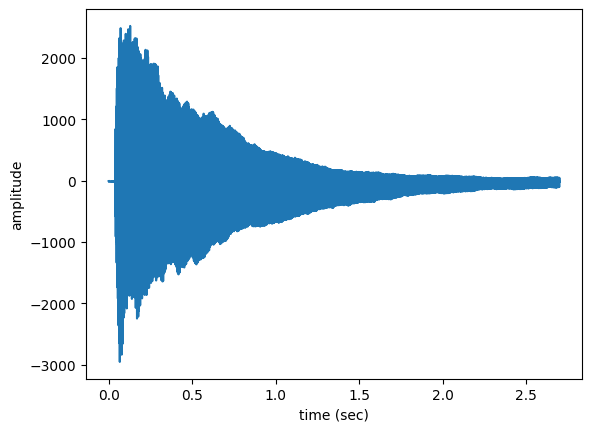

In [143]:
# here is an example of how to plot the violin data
N = len(signal)
T = 1/samplerate
t = N/samplerate # length of recording
t_array = np.arange(0,t,T)
plt.plot(t_array,signal)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

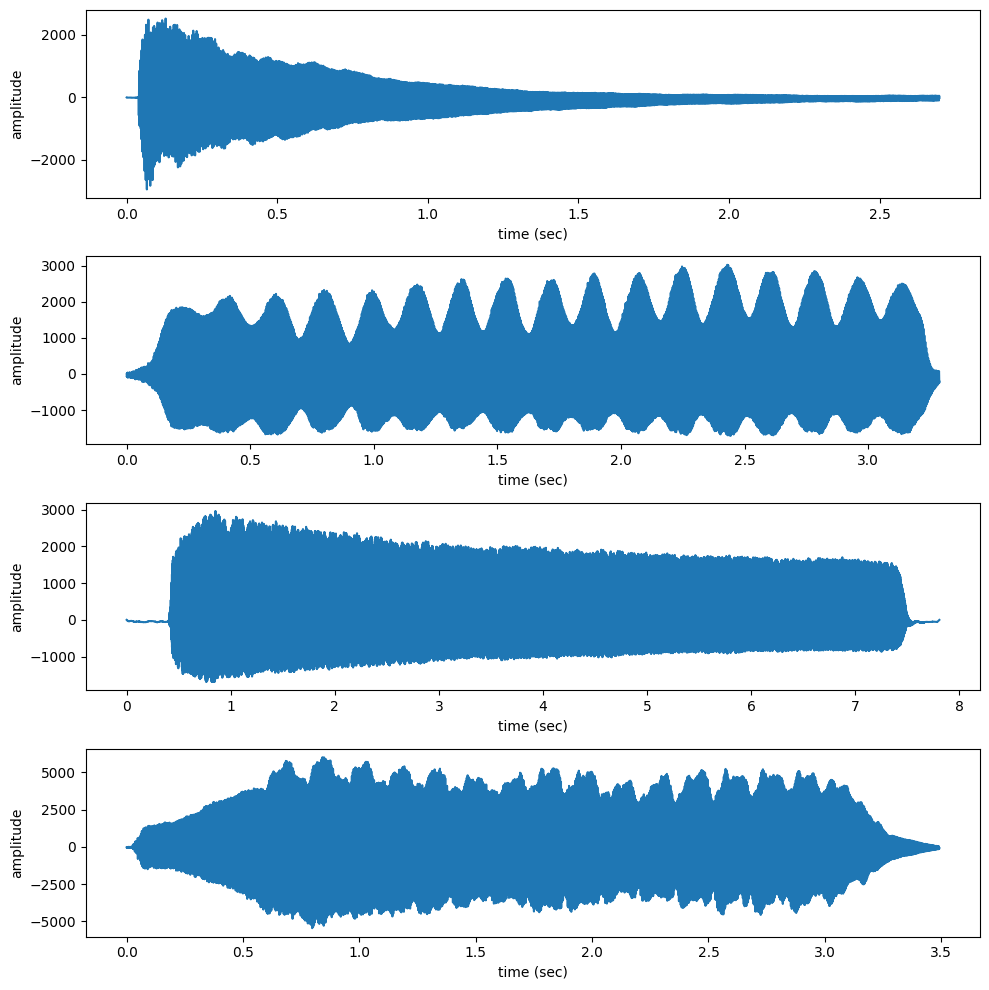

In [146]:
# compare all 4 audio files in one figure with 4 rows and 1 column
samplerate_p, signal_p = wavfile.read('piano-C4.wav')
samplerate_f, signal_f = wavfile.read('flute-C4.wav')
samplerate_t, signal_t = wavfile.read('trumpet-C4.wav')
samplerate_v, signal_v = wavfile.read('violin-C4.wav')

plt.figure(figsize=(10,10))

# Plot Piano
plt.subplot(4,1,1)
Np = len(signal_p)
Tp = 1/samplerate_p
tp = Np/samplerate_p
t_arrayp = np.arange(0,tp,Tp)
plt.plot(t_arrayp,signal_p)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

# Plot Flute
plt.subplot(4,1,2)
Nf = len(signal_f)
Tf = 1/samplerate_f
tf = Nf/samplerate_f
t_arrayf = np.arange(0,tf,Tf)
plt.plot(t_arrayf,signal_f)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

# Plot Trumpet
plt.subplot(4,1,3)
Nt = len(signal_t)
Tt = 1/samplerate_t
tt = Nt/samplerate_t
t_arrayt = np.arange(0,tt,Tt)
plt.plot(t_arrayt,signal_t)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

# Plot Violin
plt.subplot(4,1,4)
Nv = len(signal_v)
Tv = 1/samplerate_v
tv = Nv/samplerate_v
t_arrayv = np.arange(0,tv,Tv)
plt.plot(t_arrayv,signal_v)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.tight_layout()


### Plot the fft output (power versus frequency) for all 4 instruments

Remember to just plot the first have of the output arrays:
```
plt.plot(frequency[:N//2+1],np.abs(Y[:N//2+1]))
````

Here are my results for the input signal and fft spectrum:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4a.png" height=500 ><img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4b.png" height=500 >


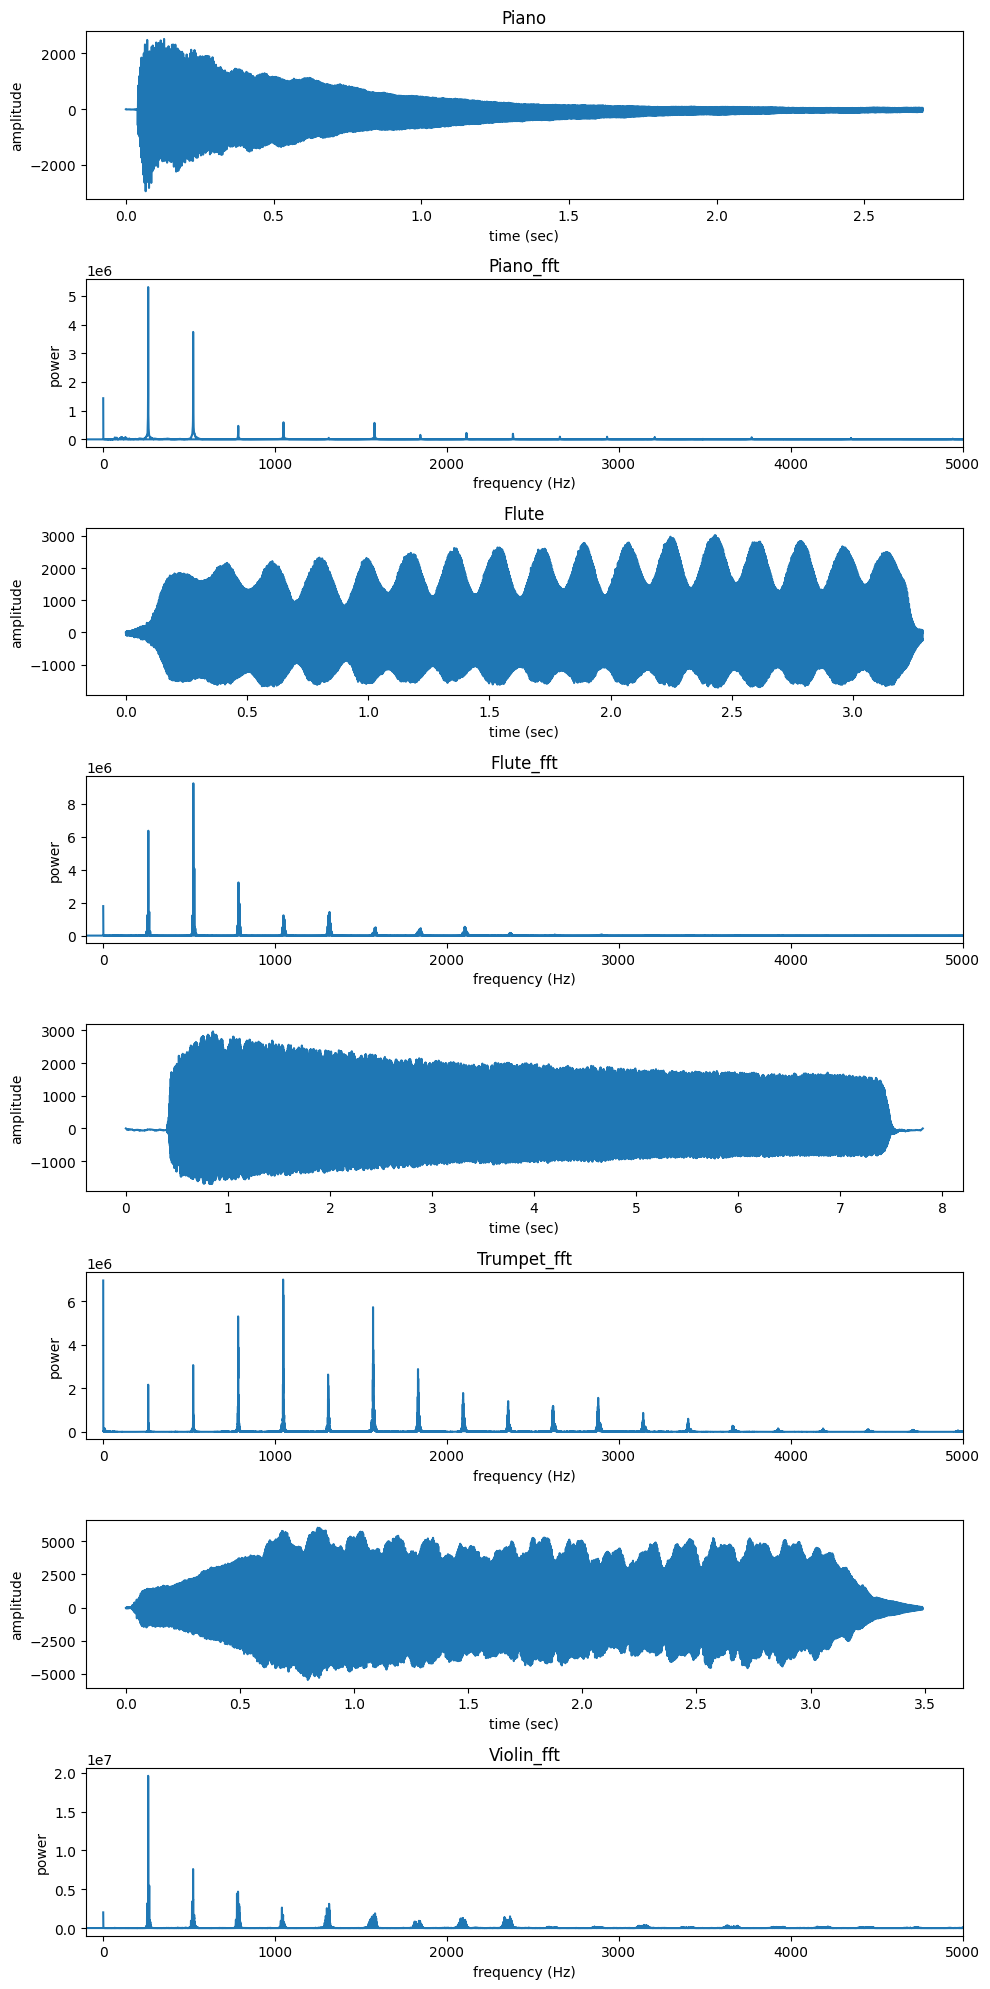

In [154]:
# plot the output from fft (plot power versus frequency) for all 4 instruments

plt.figure(figsize=(10,20))

# Plot Piano
plt.subplot(8,1,1)
Np = len(signal_p)
Tp = 1/samplerate_p
tp = Np/samplerate_p
t_arrayp = np.arange(0,tp,Tp)
plt.plot(t_arrayp,signal_p)
plt.title('Piano')
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

# fft Piano
Yp = np.fft.fft(signal_p)
frequencyp = np.fft.fftfreq(Np, d = Tp)
plt.subplot(8,1,2)
plt.plot(frequencyp[:Np//2+1],np.abs(Yp[:Np//2+1]))
plt.title('Piano_fft')
plt.xlabel("frequency (Hz)")
plt.xlim(-100,5000)
plt.ylabel("power")


# Plot Flute
plt.subplot(8,1,3)
Nf = len(signal_f)
Tf = 1/samplerate_f
tf = Nf/samplerate_f
t_arrayf = np.arange(0,tf,Tf)
plt.plot(t_arrayf,signal_f)
plt.title('Flute')
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

# fft Flute
Yf = np.fft.fft(signal_f)
frequencyf = np.fft.fftfreq(Nf, d = Tf)
plt.subplot(8,1,4)
plt.plot(frequencyf[:Nf//2+1],np.abs(Yf[:Nf//2+1]))
plt.title('Flute_fft')
plt.xlabel("frequency (Hz)")
plt.xlim(-100,5000)
plt.ylabel("power")

# Plot Trumpet
plt.subplot(8,1,5)
Nt = len(signal_t)
Tt = 1/samplerate_t
tt = Nt/samplerate_t
t_arrayt = np.arange(0,tt,Tt)
plt.plot(t_arrayt,signal_t)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

# fft Trumpet
Yt = np.fft.fft(signal_t)
frequencyt = np.fft.fftfreq(Nt, d = Tt)
plt.subplot(8,1,6)
plt.plot(frequencyt[:Nt//2+1],np.abs(Yt[:Nt//2+1]))
plt.title('Trumpet_fft')
plt.xlabel("frequency (Hz)")
plt.xlim(-100,5000)
plt.ylabel("power")

# Plot Violin
plt.subplot(8,1,7)
Nv = len(signal_v)
Tv = 1/samplerate_v
tv = Nv/samplerate_v
t_arrayv = np.arange(0,tv,Tv)
plt.plot(t_arrayv,signal_v)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

# fft Violin
Yv = np.fft.fft(signal_v)
frequencyv = np.fft.fftfreq(Nv, d = Tv)
plt.subplot(8,1,8)
plt.plot(frequencyv[:Nv//2+1],np.abs(Yv[:Nv//2+1]))
plt.title('Violin_fft')
plt.xlabel("frequency (Hz)")
plt.xlim(-100,5000)
plt.ylabel("power")

plt.tight_layout()


### Add noise to a wav file

* Download a wav file from the web, make your own, or use one of the files we already downloaded.

* Read in the file and take the `rfft`.

* Add noise to the data by setting one of the fourier coefficients to a non-zero value.

* Take the `irfft` to create a new sound file.

* Play the file with noise

```Audio(data=newsignal, rate=samplerate)```


In [177]:
samplerate, signal = wavfile.read('piano-C4.wav')

# Apply fft
fft_signal = np.fft.rfft(signal)

# Add noise
fft_signal[1000:2000] = np.random.rand(1000)

# Apply ifft
newsignal = np.fft.irfft(fft_signal)

# Play sound
Audio(data=newsignal, rate=samplerate)

### Using phyphox

Use phyphox to analyze the frequency spectrum of each wave and compare it to your results.